### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML 

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Sample Data

In [2]:
df = pd.DataFrame({
    "Product_Sell": [10, 15, 18, 22, 26, 30, 5, 31],
    "Revenue_Generation": [1000, 1400, 1800, 2400, 2600, 2800, 700, 2900]
})

X = df['Product_Sell'].values
y = df['Revenue_Generation'].values

df

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


<!--  -->

### Gradient Descent Overview
- Gradient Descent is an optimization algorithm used to minimize a loss function by iteratively moving in the direction of steepest descent (i.e., achived by using negative the previous weights with small steps) as defined by the negative of the gradient. It's commonly used to optimize machine learning algorithms, including linear regression.

- In other words,
    - ``Concept``: The fundamental algorithm. It iteratively moves in the direction of the steepest descent (negative gradient) of the function, adjusting parameters (weights and bias) to minimize error.
    - ``Update Formula``:
```text    
parameter_new = parameter_old - learning_rate * (average_gradient_over_all_data)
```
- learning_rate controls step size, and gradient is the partial derivative of the error function with respect to the parameter.
- ``Process``: Considers the error for all training examples in each iteration.

<!--  -->

<!--  -->

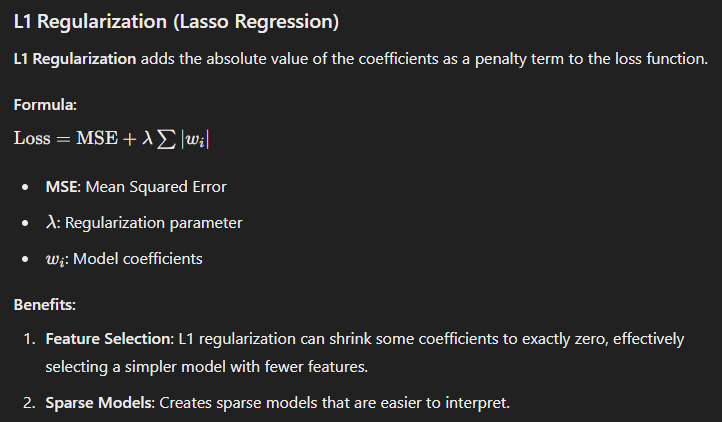

**Intial Parameters Assignments**

In [21]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# L1 regularization parameter
lambda_L1 = 0.1  
# Predictors List
predictors = ["Product_Sell"]

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}; l1_penality_intensity: {lambda_L1}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100; l1_penality_intensity: 0.1


In [22]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    for predictor in predictors: # Looping through each predictor

        # Selecting Predictor
        X_i = df[predictor].values

        # Predict 
        y_pred = predict(X_i, m, b)
        pred_error = y - y_pred

        # Compute loss
        loss = np.mean(pred_error ** 2)

        # Simplified Derivatives of Loss Function
        m_gradient = (-2/n) * np.dot(pred_error, X_i) + lambda_L1 * np.sign(m) # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
        b_gradient = (-2/n) * np.sum(pred_error) # list summation 

        # Update latest weights and intercepts
        m = m - learning_rate * (m_gradient)
        b = b - learning_rate * (b_gradient)

        # Collect progress in each epoch
        weights.append(m)
        intercepts.append(b)
        preds.append(y_pred)
        losses.append(loss)

        # Print Progress
        print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")
print("Final Loss[MSE]: ", round(losses[-1:][0],2))

m: 90.30, b:3.90, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4432500.00
m: 97.03, b:4.25, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  43208.20
m: 97.53, b:4.33, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18789.35
m: 97.57, b:4.39, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18649.69
m: 97.57, b:4.46, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18645.13
m: 97.56, b:4.52, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18641.33
m: 97.56, b:4.58, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18637.53
m: 97.56, b:4.64, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18633.73
m: 97.56, b:4.70, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18629.94
m: 97.55, b:4.76, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18626.15
m: 97.55, b:4.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18622.36
m: 97.55, b:4.89, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18618.58
m:

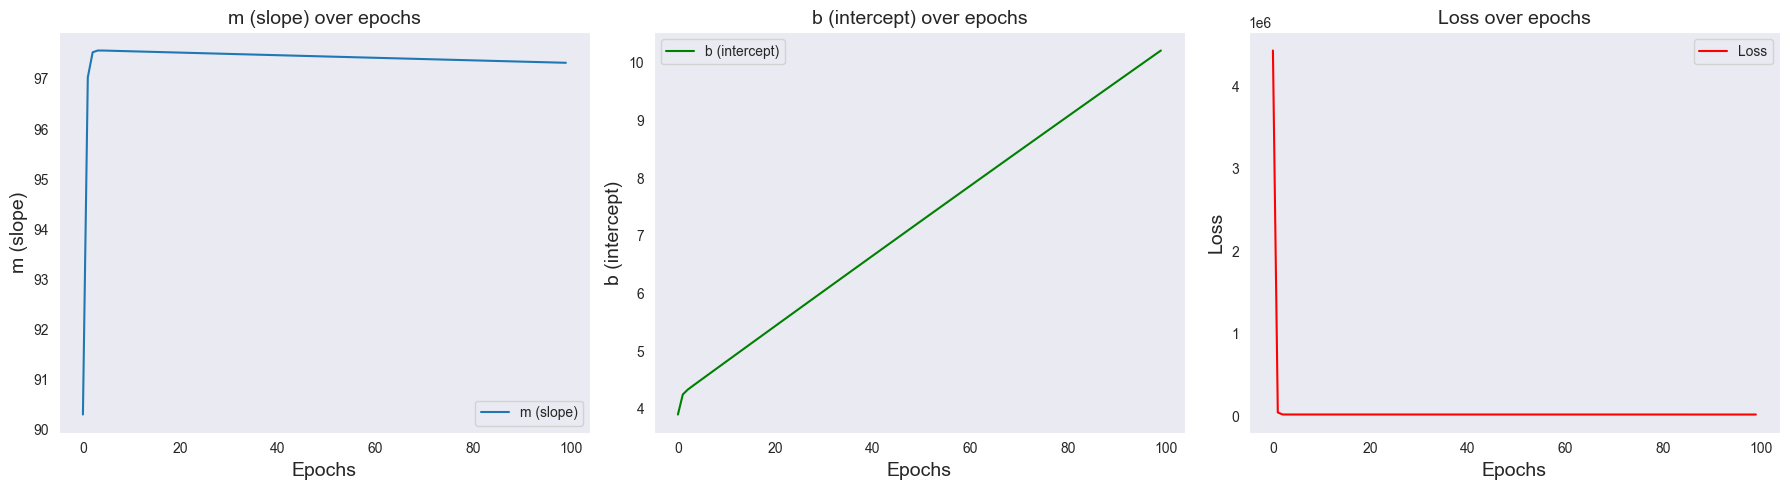

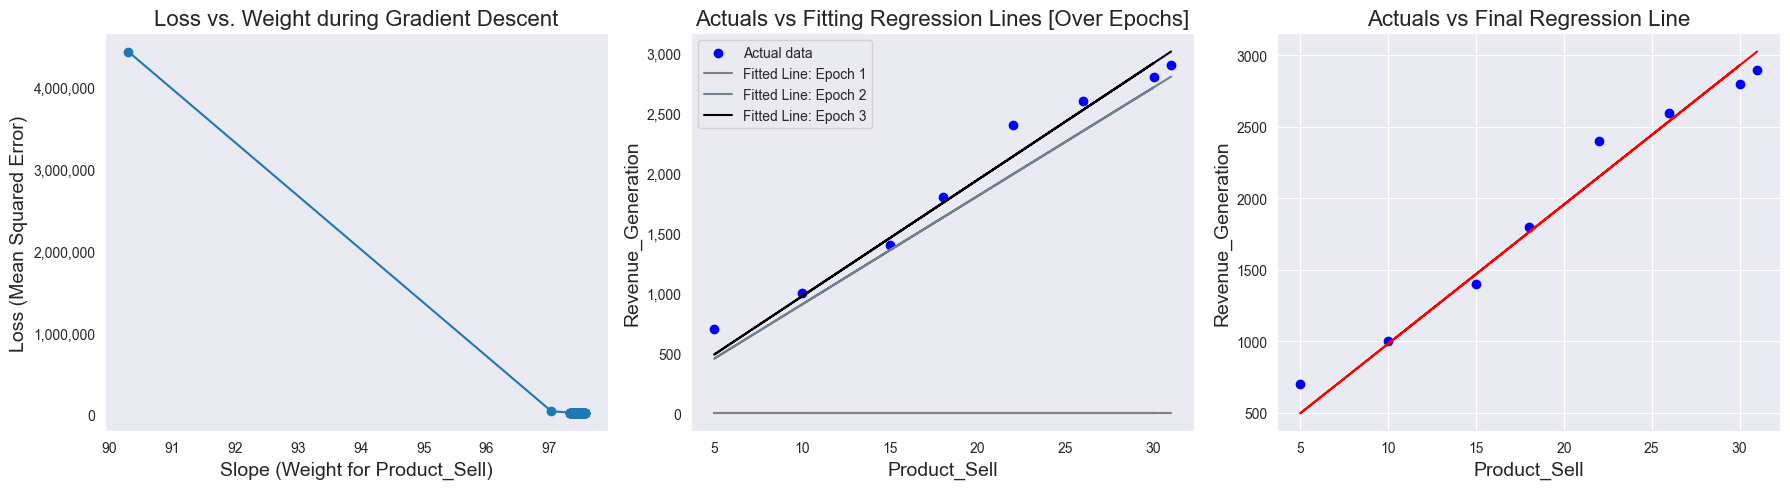

In [23]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
plt.subplot(1, 3, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 3, 3)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

<!--  -->

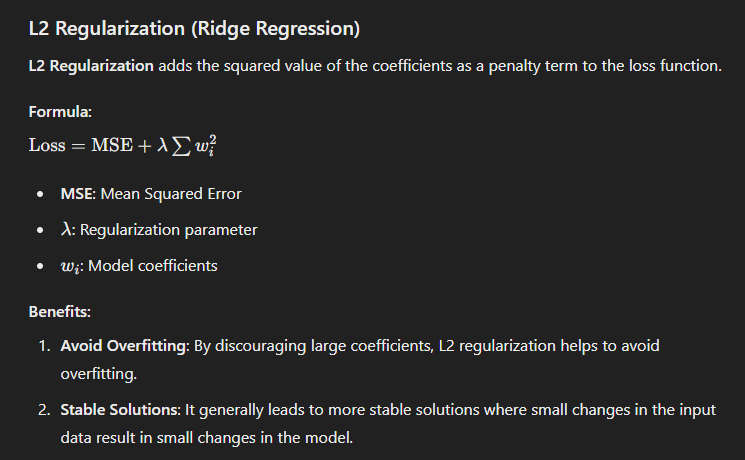

**Intial Parameters Assignments**

In [24]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# L2 regularization parameter
lambda_L2 = 0.1  
# Predictors List
predictors = ["Product_Sell"]

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}; l2_penality_intensity: {lambda_L2}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100; l2_penality_intensity: 0.1


In [25]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    for predictor in predictors: # Looping through each predictor

        # Selecting Predictor
        X_i = df[predictor].values

        # Predict 
        y_pred = predict(X_i, m, b)
        pred_error = y - y_pred

        # Compute loss
        loss = np.mean(pred_error ** 2)

        # Simplified Derivatives of Loss Function
        m_gradient = (-2/n) * np.dot(pred_error, X_i) + 2 * lambda_L2 * m # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
        b_gradient = (-2/n) * np.sum(pred_error) # list summation 

        # Update latest weights and intercepts
        m = m - learning_rate * (m_gradient)
        b = b - learning_rate * (b_gradient)

        # Collect progress in each epoch
        weights.append(m)
        intercepts.append(b)
        preds.append(y_pred)
        losses.append(loss)

        # Print Progress
        print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")
print("Final Loss[MSE]: ", round(losses[-1:][0],2))

m: 90.30, b:3.90, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4432500.00
m: 97.01, b:4.25, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  43208.20
m: 97.51, b:4.33, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18798.48
m: 97.55, b:4.40, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18650.57
m: 97.55, b:4.46, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18645.25
m: 97.54, b:4.52, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18641.34
m: 97.54, b:4.58, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18637.49
m: 97.54, b:4.65, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18633.64
m: 97.54, b:4.71, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18629.80
m: 97.53, b:4.77, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18625.95
m: 97.53, b:4.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18622.12
m: 97.53, b:4.89, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18618.28
m:

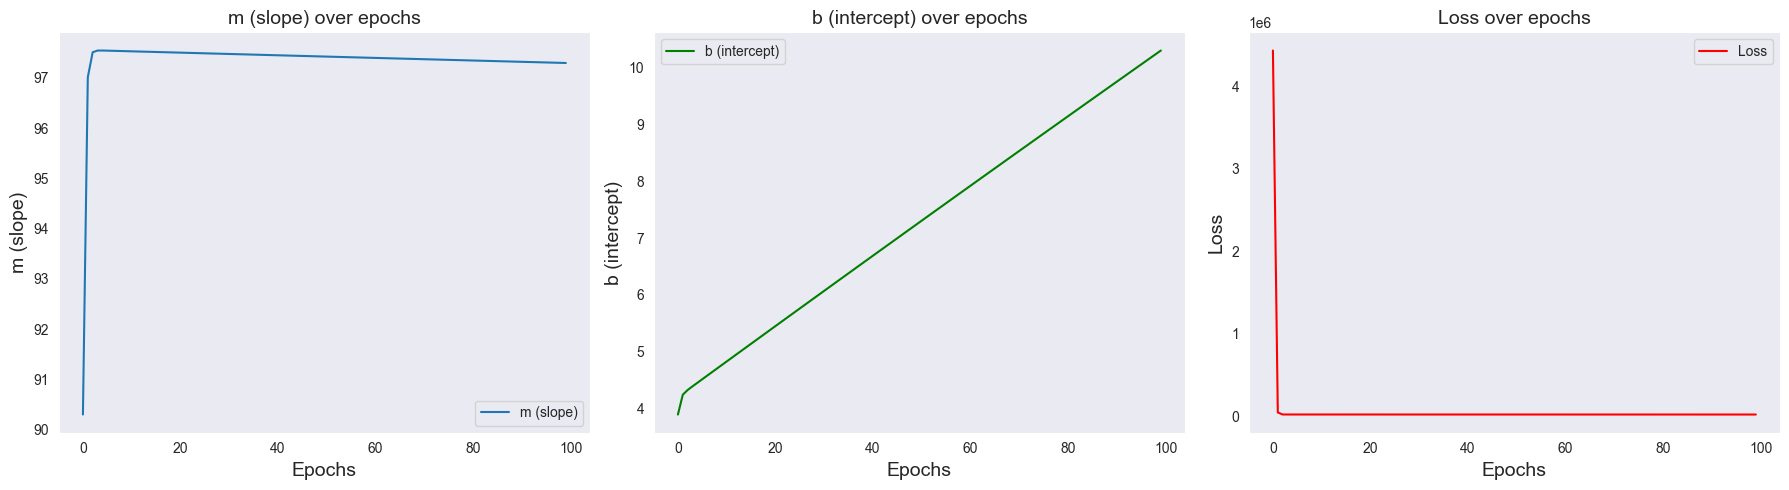

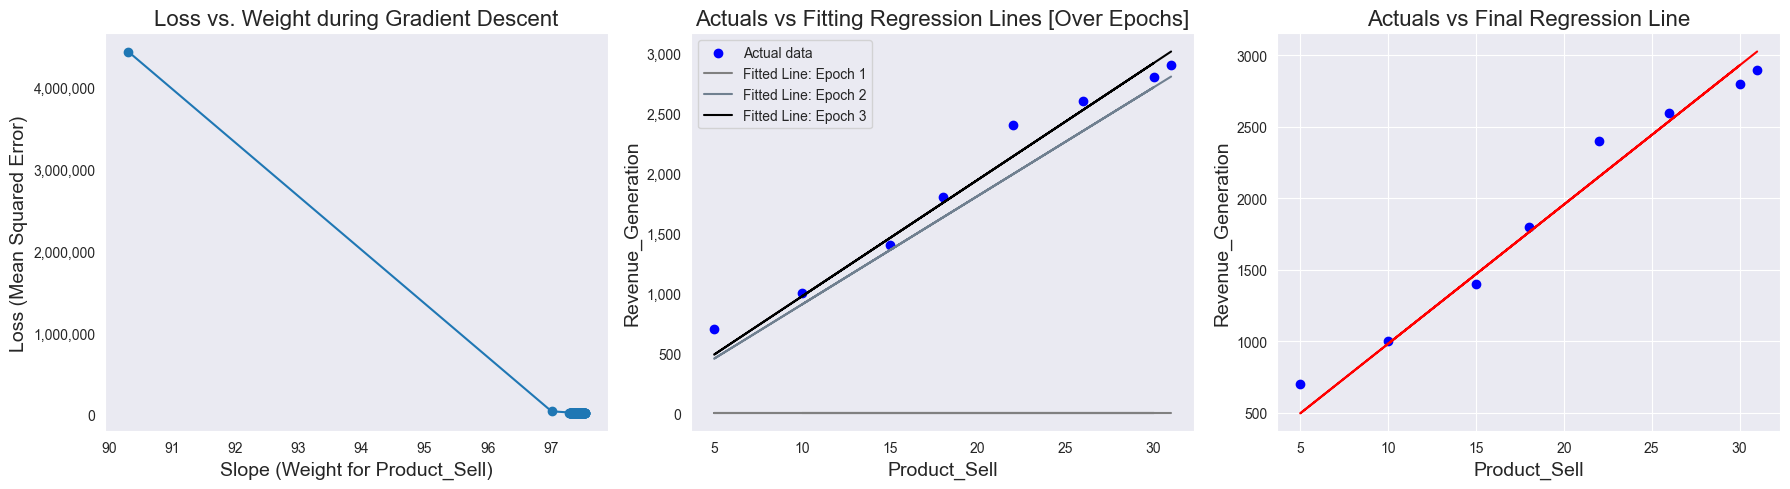

In [26]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
plt.subplot(1, 3, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 3, 3)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

<!--  -->

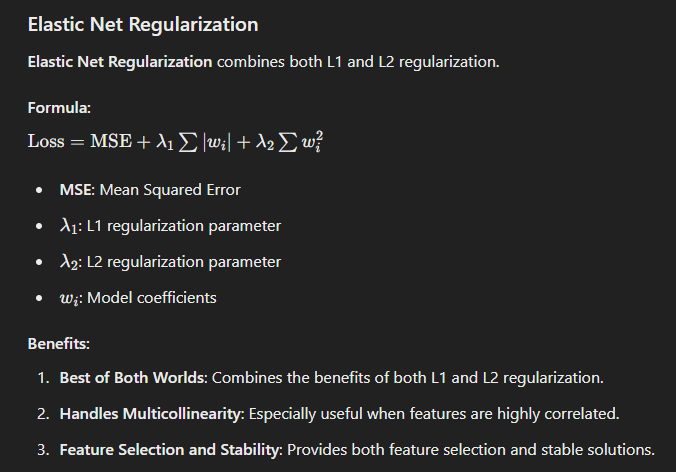

**Intial Parameters Assignments**

In [27]:
# Parameters Assignments
m = 0 # coefficients 
b = 0 # bias / intercept

def predict(x, m, b):
    return m*x + b

# Hyperparameters
learning_rate = 0.001
# Epochs / Iterations to update weights
epochs = 100
# Number of training samples
n = len(X)
# L1 regularization parameter
lambda_L1 = 0.1  
# L2 regularization parameter
lambda_L2 = 0.1  
# Predictors List
predictors = ["Product_Sell"]

print(f"Initial Assignments --> weight: {m: .2f}; bias: {b: .2f}; learning rate: {learning_rate: .4f}; epochs: {epochs}; l1_penality_intensity: {lambda_L1}; l2_penality_intensity: {lambda_L2}")


Initial Assignments --> weight:  0.00; bias:  0.00; learning rate:  0.0010; epochs: 100; l1_penality_intensity: 0.1; l2_penality_intensity: 0.1


In [28]:
# Lists to store weights, losses
weights = []
intercepts = []
losses = []
preds = []

# Stochastic Gradient Descent 
for epoch in range(epochs): # Training/Optimization Loop to find best parameters which reduces loss 
    for predictor in predictors: # Looping through each predictor

        # Selecting Predictor
        X_i = df[predictor].values

        # Predict 
        y_pred = predict(X_i, m, b)
        pred_error = y - y_pred

        # Compute loss
        loss = np.mean(pred_error ** 2)

        # Simplified Derivatives of Loss Function
        m_gradient = (-2/n) * np.dot(pred_error, X_i) + lambda_L1 * np.sign(m) + 2 * lambda_L2 * m # Matrix multiplication (multiply -> sum) like weights * input in mx + c.
        b_gradient = (-2/n) * np.sum(pred_error) # list summation 

        # Update latest weights and intercepts
        m = m - learning_rate * (m_gradient)
        b = b - learning_rate * (b_gradient)

        # Collect progress in each epoch
        weights.append(m)
        intercepts.append(b)
        preds.append(y_pred)
        losses.append(loss)

        # Print Progress
        print(f"m: {m:.2f}, b:{b:.2f}, pred: {y}, loss: {loss: .2f}")

# Final Parameters
print(f"Final Parameters --> m: {m: .2f}, b: {b: .2f}")
print("Final Loss[MSE]: ", round(losses[-1:][0],2))

m: 90.30, b:3.90, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  4432500.00
m: 97.01, b:4.25, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  43208.20
m: 97.51, b:4.33, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18798.53
m: 97.55, b:4.40, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18650.57
m: 97.55, b:4.46, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18645.25
m: 97.54, b:4.52, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18641.34
m: 97.54, b:4.58, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18637.49
m: 97.54, b:4.65, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18633.64
m: 97.54, b:4.71, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18629.80
m: 97.53, b:4.77, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18625.95
m: 97.53, b:4.83, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18622.12
m: 97.53, b:4.89, pred: [1000 1400 1800 2400 2600 2800  700 2900], loss:  18618.28
m:

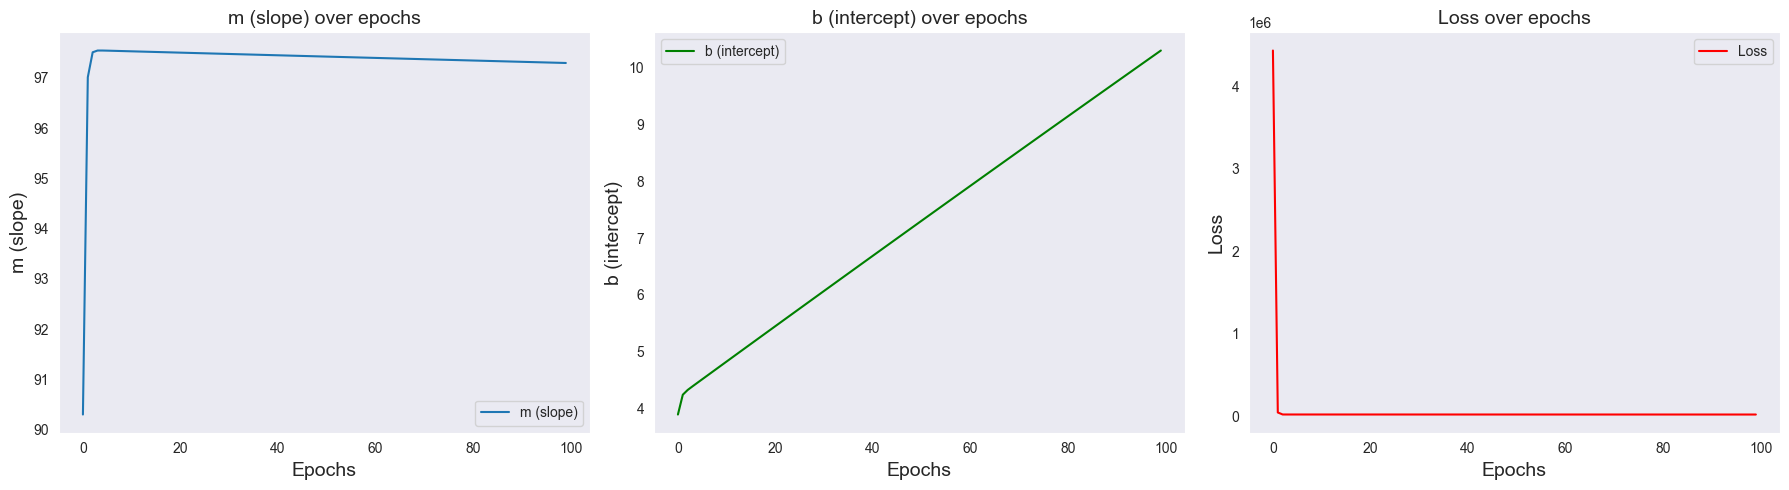

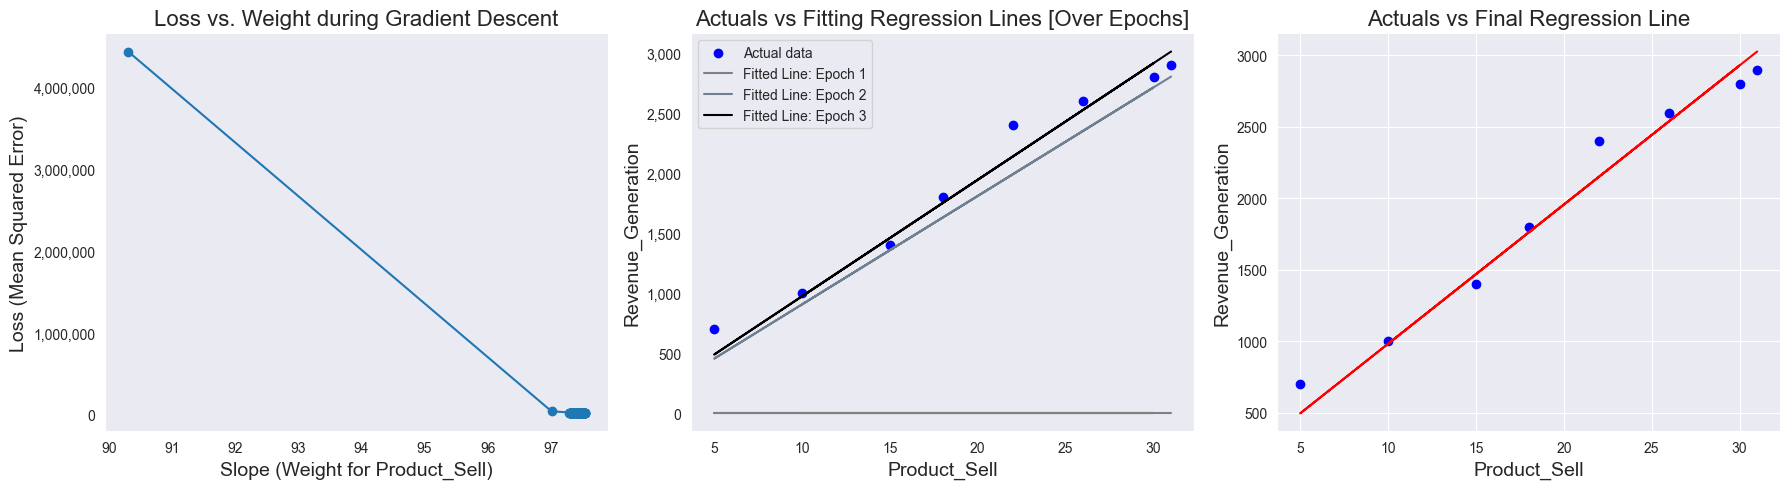

In [29]:
# Plotting the results 

sns.set_style("dark")
plt.figure(figsize=(18, 5))
# Plotting the values of m, b, and loss over epochs
plt.subplot(1, 3, 1)
plt.plot(range(epochs), weights, label='m (slope)')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('m (slope)', fontsize=14)
plt.title('m (slope) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(range(epochs), intercepts, label='b (intercept)', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('b (intercept)', fontsize=14)
plt.title('b (intercept) over epochs', fontsize=14)
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss over epochs', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(weights, losses, marker='o')
plt.xlabel('Slope (Weight for Product_Sell)', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=14)
plt.title('Loss vs. Weight during Gradient Descent', fontsize=16)
# plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting intermediate fitted lines
plt.subplot(1, 3, 2)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], preds[0], color='grey', label='Fitted Line: Epoch 1')
plt.plot(df['Product_Sell'], preds[1], color='slategrey', label='Fitted Line: Epoch 2')
plt.plot(df['Product_Sell'], preds[2], color='black', label='Fitted Line: Epoch 3')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Fitting Regression Lines [Over Epochs]', fontsize=16)
plt.legend()
# Use FuncFormatter to format y-axis values in non-scientific notation
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Plotting the fitted line
y_pred = predict(X, m, b) # Predictions
plt.subplot(1, 3, 3)
plt.scatter(df['Product_Sell'], y, color='blue', label='Actual data')
plt.plot(df['Product_Sell'], y_pred, color='red', label='Fitted line')
plt.xlabel('Product_Sell', fontsize=14)
plt.ylabel('Revenue_Generation', fontsize=14)
plt.title('Actuals vs Final Regression Line', fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

<!--  -->

### Train Model Using Sklearn

In [31]:
df

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


- **Train and Test Splits**

In [44]:
df_train = df.loc[:len(df)-3]

X_train = df_train.drop(columns=["Revenue_Generation"],axis=1) # np.array(df_train["Product_Sell"]).reshape(-1, 1)
Y_train = df_train["Revenue_Generation"] # np.array(df_train["Revenue_Generation"]).reshape(-1, 1)
print(X_train, "\n")
print(Y_train)

   Product_Sell
0            10
1            15
2            18
3            22
4            26
5            30 

0    1000
1    1400
2    1800
3    2400
4    2600
5    2800
Name: Revenue_Generation, dtype: int64


In [45]:
df_test = df.loc[len(df)-3:]

X_test = df_test.drop(columns=["Revenue_Generation"],axis=1)  # np.array(df_test["Product_Sell"]).reshape(-1, 1)
Y_test = df_test["Revenue_Generation"] # np.array(df_test["Revenue_Generation"]).reshape(-1, 1)
print(X_test, "\n")
print(Y_test)

   Product_Sell
5            30
6             5
7            31 

5    2800
6     700
7    2900
Name: Revenue_Generation, dtype: int64


<!--  -->

#### `L1/Lasso Regularization`

In [93]:
alphas = np.logspace(-4,-1,4) # alphas / penality intensify. i.e., 10^4, 10^3, 10^2, 10^1
print("alphas: ", alphas)

# Lasso / L1 Regularization
lasso_cv = linear_model.LassoCV(alphas=alphas) # cross validation # , normalize=True
lasso_model = lasso_cv.fit(X_train, Y_train) # Model Fit
lasso_preds = lasso_model.predict(X_test) # Prediction
lasso_preds = [round(x,2) for x in lasso_preds]
df_lasso_coeffs = pd.DataFrame({"variable": X_train.columns.tolist(), 
                                "Coeff":lasso_cv.coef_})

# Variable Importance i.e., mod(coeff) != 0, which are significant for Model Fit
df_lasso_coeffs[df_lasso_coeffs["Coeff"]!=0]

alphas:  [0.0001 0.001  0.01   0.1   ]


,variable,Coeff
0,Product_Sell,95.97024


In [94]:
print("lasso_cv.alpha_: ", lasso_cv.alpha_)

lasso_cv.alpha_:  0.0001


In [102]:
1/0.0001 # 1/alpha

10000.0

In [95]:
lasso_preds

[2943.71, 544.45, 3039.68]

- **Performance**

In [96]:
def mse(true,pred):
    ''' 
    Calculate MSE value
    '''    
    return np.mean((pred-true)**2)

In [97]:
print("Loss: ", round(mse(Y_test,lasso_preds),2))

Loss:  21452.96


<!--  -->

#### `L2/Ridge Regularization`

In [98]:
alphas = np.logspace(-4,-1,4) # alphas / penality intensify. i.e., 10^4, 10^3, 10^2, 10^1
print("alphas: ", alphas)

# Ridge / L2 Regularization
ridge_cv = linear_model.RidgeCV(alphas=alphas) # cross validation # , normalize=True
ridge_model = ridge_cv.fit(X_train, Y_train) # Model Fit
ridge_preds = ridge_model.predict(X_test) # Prediction
ridge_preds = [round(x,2) for x in ridge_preds]
df_ridge_coeffs = pd.DataFrame({"variable": X_train.columns.tolist(), 
                                "Coeff":ridge_cv.coef_})

# Variable Importance i.e., mod(coeff) > 0.001, which are significant for Model Fit
df_ridge_coeffs[df_ridge_coeffs["Coeff"]>=0.001]

alphas:  [0.0001 0.001  0.01   0.1   ]


,variable,Coeff
0,Product_Sell,95.934556


In [99]:
print("ridge_cv.alpha_: ", ridge_cv.alpha_)

ridge_cv.alpha_:  0.1


In [101]:
1/0.1 # 1/alpha

10.0

In [100]:
ridge_preds

[2943.36, 544.99, 3039.29]

- **Performance**

In [91]:
print("Loss: ", round(mse(Y_test,ridge_preds),2))

Loss:  21327.3


<!--  -->

#### `Elastic Net Regularization`

In [103]:
alphas = np.logspace(-4,-1,4) # alphas / penality intensify. i.e., 10^4, 10^3, 10^2, 10^1
print("alphas: ", alphas)

# Elastic Net
elastic_net_cv = linear_model.ElasticNetCV(alphas=alphas) # cross validation # , normalize=True
elastic_net_model = elastic_net_cv.fit(X_train, Y_train) # Model Fit
elastic_net_preds = elastic_net_model.predict(X_test) # Prediction
elastic_net_preds = [round(x,2) for x in elastic_net_preds]
df_elastic_net_coeffs = pd.DataFrame({"variable": X_train.columns.tolist(), 
                                "Coeff":elastic_net_cv.coef_})

# Variable Importance i.e., mod(coeff) > 0.001 which is also !=0, which are significant for Elastic Model Fit
df_elastic_net_coeffs[df_elastic_net_coeffs["Coeff"]>=0.001]

alphas:  [0.0001 0.001  0.01   0.1   ]


,variable,Coeff
0,Product_Sell,95.970134


In [104]:
print("elastic_net_cv.alpha_: ", elastic_net_cv.alpha_)

elastic_net_cv.alpha_:  0.0001


In [105]:
elastic_net_preds

[2943.71, 544.45, 3039.68]

- **Performance**

In [106]:
print("Loss: ", round(mse(Y_test,elastic_net_preds),2))

Loss:  21452.96


<!--  -->

### Keypoints

- All above variations of regularizations works pretty well, as it is simple data with single predictor. It will show significant differences, when there many predictors and huge data. 
- In general regularization works for,
    - Prevents Overfitting: Regularization discourages complex models that might fit the training data too well, thus helping the model generalize better to new data.
    - Simplifies Models: By penalizing large coefficients, regularization can lead to simpler models that are easier to interpret and use.
    - Improves Stability: Regularization leads to more stable models where predictions are less sensitive to small changes in the training data.